In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = 'drive/MyDrive/Tugas 3 DL/'

Mounted at /content/drive


In [ ]:
!pip install technical-analysis
!pip install ta
!pip install pandas_ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=c57a7ea96af9834f0cae7491be3117127a7af92114b3f6d7ef395fc60719784b
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=3492bcd860a3d1586e87a0fd3113adbacc092ed536ba6cd717a283d70c3b006f
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import requests

import technical_analysis
from technical_analysis import moving_average, indicators
import ta
from ta import add_all_ta_features
from ta.utils import dropna
import pandas_ta

from tqdm import tqdm
from collections import Counter

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [ ]:
# API_KEY = 'SVIS9RVCW1LBU6B5'
# # 'https://www.alphavantage.co/query?function=SMA&symbol=IBM&interval=weekly&time_period=10&series_type=open&apikey={API_KEY}'
# # 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey={API_KEY}&datatype=csv'

# name = 'NVDA'

# intervals = [i for i in range(1, 91)]
# for i in intervals:
#     url = f'https://www.alphavantage.co/query?function=SMA&symbol={name}&interval=daily&time_period={i}&series_type=close&apikey={API_KEY}&data_type=csv'
#     r = requests.get(url)
#     content = r.content
#     f = open(f'{name}_SMA_{i}.csv', 'wb')
#     f.write(content)
#     f.close()

In [ ]:
df = pd.read_csv(path + 'daily_NVDA.csv')
df = df.sort_values('timestamp').reset_index().drop('index', axis=1)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['timestamp'] = df['timestamp'].dt.date
init_cols = list(df.columns)
df

,timestamp,open,high,low,close,volume
0,1999-11-01,21.75,24.3800,21.75,23.50,1630300
1,1999-11-02,23.94,25.1300,23.75,25.00,1744800
2,1999-11-03,26.00,28.1300,25.81,27.44,4191000
3,1999-11-04,27.75,29.9400,27.75,29.19,2625700
4,1999-11-05,30.00,30.2500,26.88,28.25,1284100
...,...,...,...,...,...,...
6185,2024-06-03,1136.21,1150.0000,1120.03,1150.00,43839176
6186,2024-06-04,1157.16,1166.0000,1140.45,1164.37,40332401
6187,2024-06-05,1183.71,1224.4950,1174.68,1224.40,52840178
6188,2024-06-06,1240.48,1255.8700,1183.20,1209.98,66469619


In [ ]:
def get_technical_analysis(df):
    df = df.copy()
    intervals = [i for i in range(3, 22)]
    for i in intervals:
        df[f'sma_{i}'] = moving_average.sma(price=df['close'], period=i)
        df[f'ema_{i}'] = moving_average.ema(price=df['close'], period=i)
        df[f'tma_{i}'] = moving_average.tma(price=df['close'], period=i)
        df[f'lwma_{i}'] = moving_average.lwma(price=df['close'], period=i)
        df[f'wilderma_{i}'] = moving_average.wilder_ma(price=df['close'], period=i)
        df[f'kama_{i}'] = moving_average.kama(price=df['close'], period=i, min_smoothing_constant=3, max_smoothing_constant=30)
        df[f'gma_{i}']= moving_average.gma(price=df['close'], period=i)
        #     df[f'dema_{i}'] = moving_average.double_ema(price=df['close'], period=i)
        #     df[f'tema_{i}'] = moving_average.triple_ema(price=df['close'], period=i)

        df[f'atr_{i}'] = indicators.atr(high=df['high'], low=df['low'], close=df['close'], period=i)
        df[f'rsi_{i}'] = indicators.rsi(price=df['close'], period=i)
        df[f'willr_{i}'] = indicators.perc_r(high=df['high'], low=df['low'], close=df['close'], period=i)
        df[f'trix_{i}'] = indicators.trix(price=df['close'], period=i)

        df[f'std_{i}'] = pandas_ta.stdev(close=df['close'], length=i)
        df[f'roc_{i}'] = pandas_ta.roc(close=df['close'], length=i)
        df[f'ppo_{i}'] = pandas_ta.cmo(close=df['close'], length=i)
        df[f'hma_{i}'] = pandas_ta.hma(close=df['close'], length=i)
        df[f'wma_{i}'] = pandas_ta.wma(close=df['close'], length=i)
        df[f'tema_{i}'] = pandas_ta.tema(close=df['close'], length=i)
        df[f'cci_{i}'] = pandas_ta.cci(high=df['high'], low=df['low'], close=df['close'], length=i)
        df[f'cmf_{i}'] = pandas_ta.cmf(high=df['high'], low=df['low'], volume=df['volume'], close=df['close'], length=i)

        # df[f'tsi'] = indicators.tsi(price=df['close'], period1=25, period2=13) # standard parameter
        # df[f'macd'] = indicators.macd(price=df['close'], return_histogram=False)

    return df

In [ ]:
df_new = get_technical_analysis(df)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Columns: 367 entries, timestamp to cmf_21
dtypes: float64(365), int64(1), object(1)
memory usage: 17.3+ MB


In [ ]:
ordered_indicators = ['std', 'sma', 'ema', 'tema', 'tma', 'lwma', 'wilderma', 'kama', 'gma', 'hma', 'wma',
                      'rsi', 'willr', 'cci', 'cmf', 'ppo', 'roc', 'atr', 'trix']

ordered_cols = init_cols
intervals = [i for i in range(3, 22)]
for indicator in ordered_indicators:
    ordered_cols.extend([f'{indicator}_{i}' for i in intervals])

df_new = df_new.reindex(ordered_cols, axis=1)
df_new.info(), df_new.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Columns: 367 entries, timestamp to trix_21
dtypes: float64(365), int64(1), object(1)
memory usage: 17.3+ MB


(None, (6190, 367))

In [ ]:
def create_labels(df, col_name, window_size=11):
    """
    Data is labeled as per the logic in research paper
    Label code : BUY => 1, SELL => 0, HOLD => 2

    params :
        df => Dataframe with data
        col_name => name of column which should be used to determine strategy

    returns : numpy array with integer codes for labels with
                  size = total-(window_size)+1
    """

    row_counter = 0
    total_rows = len(df)
    labels = np.zeros(total_rows)
    labels[:] = np.nan
    print("Calculating labels")
    pbar = tqdm(total=total_rows)

    while row_counter < total_rows:
        if row_counter >= window_size - 1:
            window_begin = row_counter - (window_size - 1)
            window_end = row_counter
            window_middle = (window_begin + window_end) // 2

            min_ = np.inf
            min_index = -1
            max_ = -np.inf
            max_index = -1
            for i in range(window_begin, window_end + 1):
                price = df.iloc[i][col_name]
                if price < min_:
                    min_ = price
                    min_index = i
                if price > max_:
                    max_ = price
                    max_index = i

            if max_index == window_middle:
                labels[window_middle] = 0
            elif min_index == window_middle:
                labels[window_middle] = 1
            else:
                labels[window_middle] = 2

        row_counter = row_counter + 1
        pbar.update(1)

    pbar.close()
    return labels

In [ ]:
labels = create_labels(df=df_new, col_name='close', window_size=11)

Calculating labels


100%|██████████| 6190/6190 [00:48<00:00, 128.28it/s]


In [ ]:
df_new['labels'] = labels
df_new.shape

(6190, 368)

In [ ]:
df_new

In [ ]:
df_new.dropna(inplace=True)
for col in list(df_new.columns):
    if(sum(pd.isna(df_new[col])) == len(df_new)):
        print(col)
df_new['labels'] = df_new['labels'].astype(int)
df_new.reset_index(inplace=True)
df_new.shape

(6156, 369)

In [ ]:
BUY = [None for i in range(len(df_new))]
SELL = [None for i in range(len(df_new))]
HOLD = [None for i in range(len(df_new))]
buy = 0
sell = 0
hold = 0

for i in range(len(df_new['labels'])):
    if df_new['labels'][i] == 1 :
        BUY[i] = (df_new['close'][i])
        buy += 1
    if df_new['labels'][i] == 0 :
        SELL[i] = (df_new['close'][i])
        sell += 1
    if df_new['labels'][i] == 2 :
        HOLD[i] = (df_new['close'][i])
        hold += 1

print(f'Jumlah Label: SELL(0) = {sell}, BUY(1) = {buy}, HOLD(2) = {hold}')

Jumlah Label: SELL(0) = 364, BUY(1) = 360, HOLD(2) = 5432


In [ ]:
df_new['timestamp'][1]

datetime.date(1999, 12, 14)

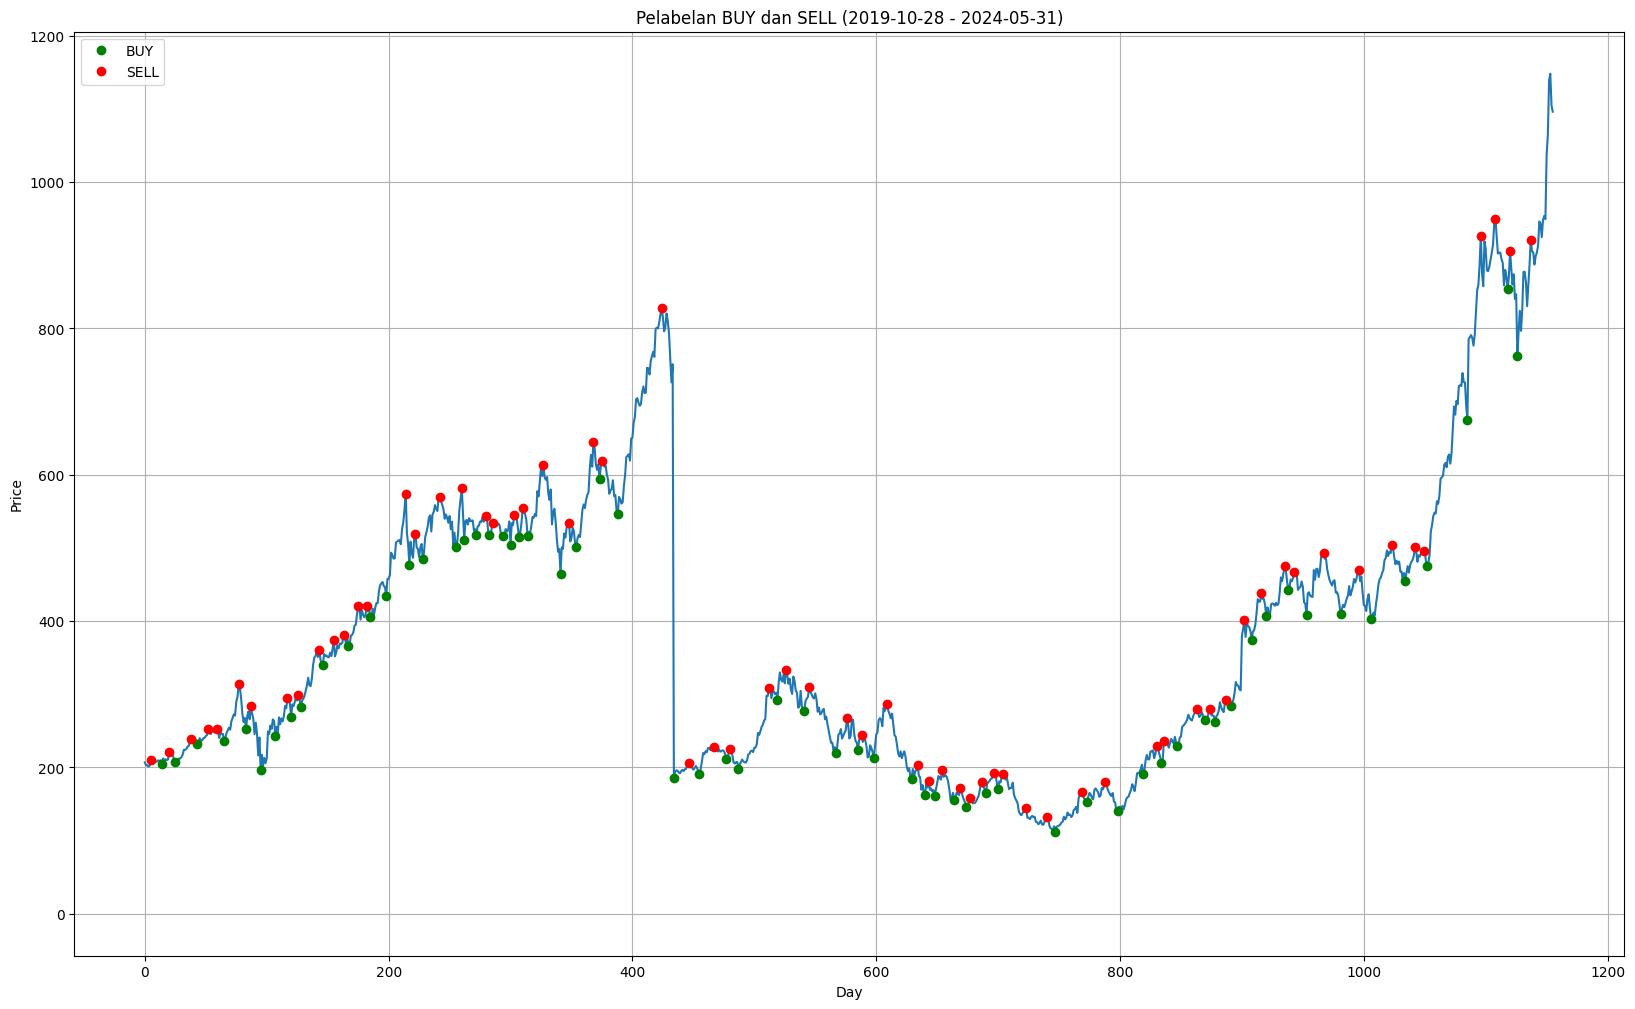

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
# ax.set_facecolor('black')
start, end = 5000, len(df_new)
margin = 0.05 * (end-start)

plt.plot(np.array(df_new['close'][start:end]))
plt.plot(BUY[start:end], 'go', label="BUY")
plt.plot(SELL[start:end], 'ro', label='SELL')
plt.hlines(0, xmin=start, xmax=end)
plt.title(f'Pelabelan BUY dan SELL ({df_new.timestamp[start]} - {df_new.timestamp[(end-1)]})')
plt.legend()
plt.xlabel("Day")
plt.ylabel("Price")
# plt.xticks(range(start, end, 1000))
plt.xlim([-margin, (end-start) + margin])
# plt.ylim(0,70)
plt.grid()

plt.show()

In [ ]:
df_new.to_csv(path + 'daily_NVDA_preprocessed.csv', index=False)

Lanjut ke CNN.ipynb

In [ ]:
# #Image dari label saham
# i = 9576
# a = x_train[i].reshape(16,16)
# fig, ax = plt.subplots(figsize=(10,5))
# plt.imshow(a, cmap='hot', interpolation='nearest')
# plt.show()
# print("Image Untuk Label Saham",y_train[i])

In [ ]:
# y = df_new['labels'].values
# np.save('y.npy', y)

In [ ]:
# list_features = list(df.loc[:, 'std_3':'trix_21'].columns)
# print('Total number of features:', len(list_features))
# x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'std_3':'trix_21'].values, df['labels'].values, train_size=0.8,
#                                                     test_size=0.2, random_state=2, shuffle=True, stratify=df['labels'].values)

# if 0.7*x_train.shape[0] < 2500:
#     train_split = 0.8
# else:
#     train_split = 0.7

# print('train_split =',train_split)
# x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=train_split, test_size=1-train_split,
#                                                 random_state=2, shuffle=True, stratify=y_train)
# mm_scaler = MinMaxScaler(feature_range=(-1, 1)) # or StandardScaler?
# x_train = mm_scaler.fit_transform(x_train)
# x_cv = mm_scaler.transform(x_cv)
# x_test = mm_scaler.transform(x_test)

# s_scaler = MinMaxScalerScaler(with_mean=0, with_std=1)
# x_train = s_scaler.fit_transform(x_train)
# x_cv = s_scaler.transform(x_cv)
# x_test = s_scaler.transform(x_test)

# print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

In [ ]:
# def reshape_as_image(x, img_width, img_height):
#     x_temp = np.zeros((len(x), img_height, img_width))
#     for i in range(x.shape[0]):
#         x_temp[i] = np.reshape(x[i], (img_height, img_width))

#     return x_temp

In [ ]:
# num_features = len(list_features)
# dim = int(np.sqrt(num_features))
# x_train = reshape_as_image(x_train, dim, dim)
# x_cv = reshape_as_image(x_cv, dim, dim)
# x_test = reshape_as_image(x_test, dim, dim)
# # adding a 1-dim for channels (3)
# x_train = np.stack((x_train,) * 3, axis=-1)
# x_test = np.stack((x_test,) * 3, axis=-1)
# x_cv = np.stack((x_cv,) * 3, axis=-1)
# print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

In [ ]:
# np.save('x_train', x_train)
# np.save('x_cv', x_cv)
# np.save('x_test', x_test)
# np.save('y_train', y_train)
# np.save('y_cv', y_cv)
# np.save('y_test', y_test)

# dat = np.load('x_train.npy')
# sum(sum(sum(sum(dat == x_train)))), x_train.shape == dat.shape